<a href="https://colab.research.google.com/github/VitoZac96/Thesis_public/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

from matplotlib.pyplot import figure

In [4]:

from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from keras.layers import Dropout
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from keras.callbacks import EarlyStopping
from keras.models import Sequential

In [ ]:
!pip install yfinance
!pip install yahoofinancials

In [ ]:
import yfinance as yf
from yahoofinancials import YahooFinancials

import numpy
import pandas as pd


from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [693]:
data = yf.download('AAPL', 
                      start='2010-01-01',    #'2015-07-07'
                      end='2021-04-05', 
                      progress=False)

data = data["Adj Close"].values

In [694]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(np.array(data).reshape(-1,1))

In [695]:
##splitting dataset into train and test split
training_size = int(len(scaled_data) * 0.985)
test_size = len(scaled_data) - training_size

train_data, test_data = scaled_data[0:training_size,:] , scaled_data[training_size:,:]

In [696]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):

	dataX, dataY = [], []
  
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [709]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 5
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [710]:
X_test.shape, ytest.shape

((37, 5), (37,))

In [711]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [712]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(Dropout(0.1))

model.add(LSTM(50,return_sequences=True))
#model.add(Dropout(0.1))

model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')

In [713]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=200,batch_size=64,verbose=1)

Epoch 1/200
44/44 [==============================] - 5s 29ms/step - loss: 0.0369 - val_loss: 0.0095
Epoch 2/200
44/44 [==============================] - 0s 7ms/step - loss: 8.0456e-04 - val_loss: 0.0033
Epoch 3/200
44/44 [==============================] - 0s 7ms/step - loss: 2.4202e-04 - val_loss: 0.0020
Epoch 4/200
44/44 [==============================] - 0s 7ms/step - loss: 2.1633e-04 - val_loss: 7.2093e-04
Epoch 5/200
44/44 [==============================] - 0s 7ms/step - loss: 1.8417e-04 - val_loss: 5.8677e-04
Epoch 6/200
44/44 [==============================] - 0s 7ms/step - loss: 1.8495e-04 - val_loss: 8.9401e-04
Epoch 7/200
44/44 [==============================] - 0s 7ms/step - loss: 1.6482e-04 - val_loss: 0.0014
Epoch 8/200
44/44 [==============================] - 0s 7ms/step - loss: 1.5585e-04 - val_loss: 0.0023
Epoch 9/200
44/44 [==============================] - 0s 8ms/step - loss: 2.2051e-04 - val_loss: 0.0010
Epoch 10/200
44/44 [==============================] - 0s 7ms/ste

In [714]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

##Transformback to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

true = scaler.inverse_transform(scaled_data[training_size:,:1])
true = true[time_step:-1]

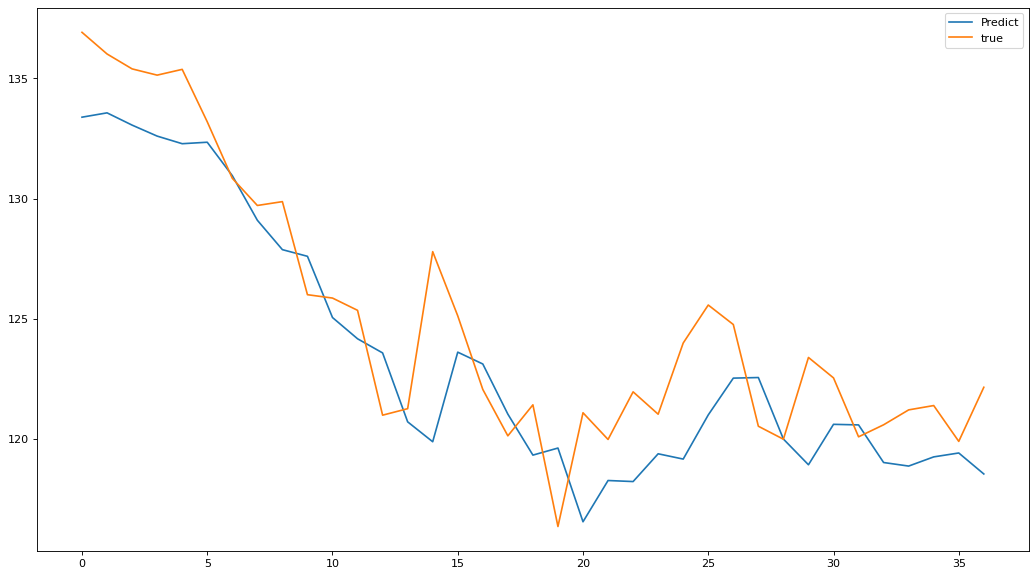

In [715]:
figure(figsize=(16, 9), dpi=80)
plt.plot(test_predict, label = "Predict")
plt.plot(true, label = "true")
plt.legend()
plt.show()

In [716]:
true_list = []
pred = []
for i in range(len(test_predict)):
  pred.append(test_predict[i][0])
  true_list.append(true[i][0])

In [717]:
df = pd.DataFrame()
df["ture"] = true_list
df["pred"] = pred
df

,ture,pred
0,136.910004,133.381500
1,136.009995,133.561478
2,135.389999,133.051743
3,135.130005,132.595062
4,135.369995,132.278488
5,133.190002,132.339981
6,130.839996,130.950500
7,129.710007,129.095947
8,129.869995,127.872810
9,126.000000,127.596466


In [718]:
ret = df.pct_change().iloc[1:,0]

ret_list = [0]
for el in ret:
  ret_list.append(el)
len(ret_list)

37

In [719]:
ret_strat = [0]
for i in range(len(ret)):
  if pred[i+1] > pred[i]:
    ret_strat.append(ret.iloc[i])
  else:
    ret_strat.append(0)

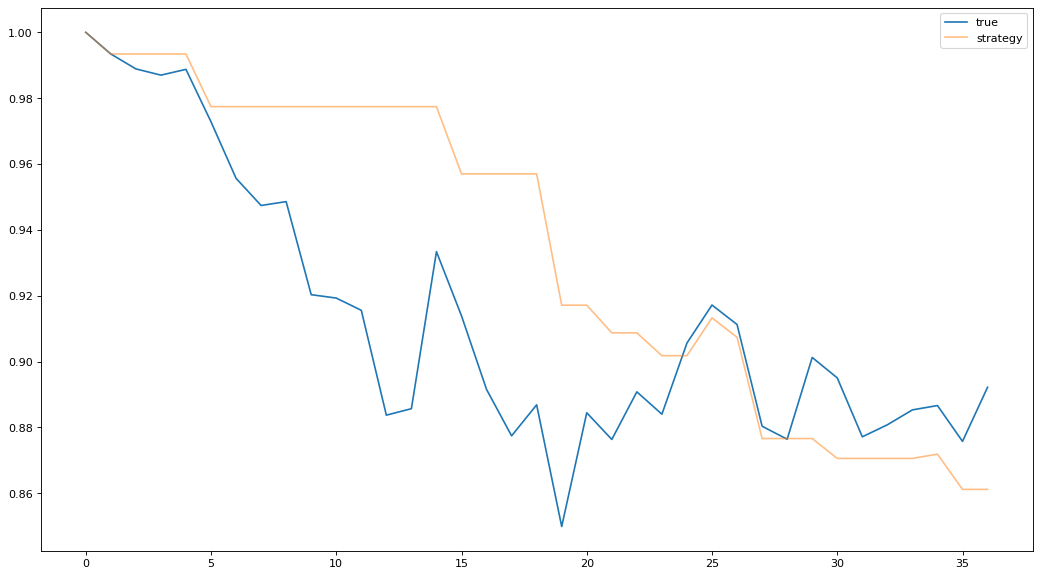

In [720]:
figure(figsize=(16, 9), dpi=80)
plt.plot((np.array(ret_list)+1).cumprod(), label = "true")

to_plot = (np.array(ret_strat)+1).cumprod()

plt.plot(to_plot, label= "strategy", alpha = 0.5)
plt.legend()
plt.show()